# **Analysis On The ML Dataset**


# **Start pySpark**
This code was given to us. This code starts pySpark

In [ ]:
# We added this code since pySpark because pyspark imports was giving us an error that pyspark modules cannot
# resolved
!pip install pyspark

# This is the code that was given to us
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://dlcdn.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
!tar -xvf spark-3.3.3-bin-hadoop3.tgz
!pip install findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.3-bin-hadoop3"

import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

sc = spark.sparkContext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=d8115d1e7948e33adf0d25a3a35194dff8eede701b072ca5d1913609edbc2b3a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
--2023-12-14 23:00:49--  https://dlcdn.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299426263 (286M) [application/x-gzip]
Saving to: ‘spark-3.3.3-bin-hadoop3.tgz’

spark-3.3.3-bin-had 100%[===================>] 285.55M   231MB/s    in 1.2s    

2023-12-14 23:00:59 (231 MB/s) - ‘spark-3.3.3-bin-hadoop3.tgz’ saved [299426263/299426263]

spark-3.3.3-bin-h

# **Exploratory Data Analysis**
Show all columns of final machine learning dataset

In [ ]:
# Import the dependencies
import pandas as pd

# Load the Filename
fileName = '/content/Machine_Learning_Dataset.csv'

df = pd.read_csv(fileName)

# Display columns line by line
for column in df.columns:
    print(column)

artist_familiarity
artist_hotttnesss
artist_latitude
artist_longitude
artist_name
song_hotttnesss
audio_md5
duration
end_of_fade_in
key
key_confidence
loudness
start_of_fade_out
tempo
time_signature
time_signature_confidence
year


Describe the dataset

In [ ]:
# Import the dependencies
import pandas as pd

# Display summary statistics for numeric columns
description = df.describe()

# Print the result
print(description)

       artist_familiarity  artist_hotttnesss  artist_latitude  \
count         9995.000000        9999.000000      3742.000000   
mean             0.565452           0.385550        37.157357   
std              0.160169           0.143654        15.598494   
min              0.000000           0.000000       -41.280540   
25%              0.467602           0.325227        33.748310   
50%              0.563584           0.380728        38.997920   
75%              0.668020           0.453866        43.648560   
max              1.000000           1.082503        69.651020   

       artist_longitude  song_hotttnesss     duration  end_of_fade_in  \
count       3742.000000      5648.000000  9999.000000     9999.000000   
mean         -63.933358         0.342822   238.454175        0.758692   
std           50.508223         0.247220   114.018492        1.868030   
min         -162.436500         0.000000     1.044440        0.000000   
25%          -93.291560         0.000000   176.02

Create a correlation matrix

<ipython-input-9-ae858699d48e>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


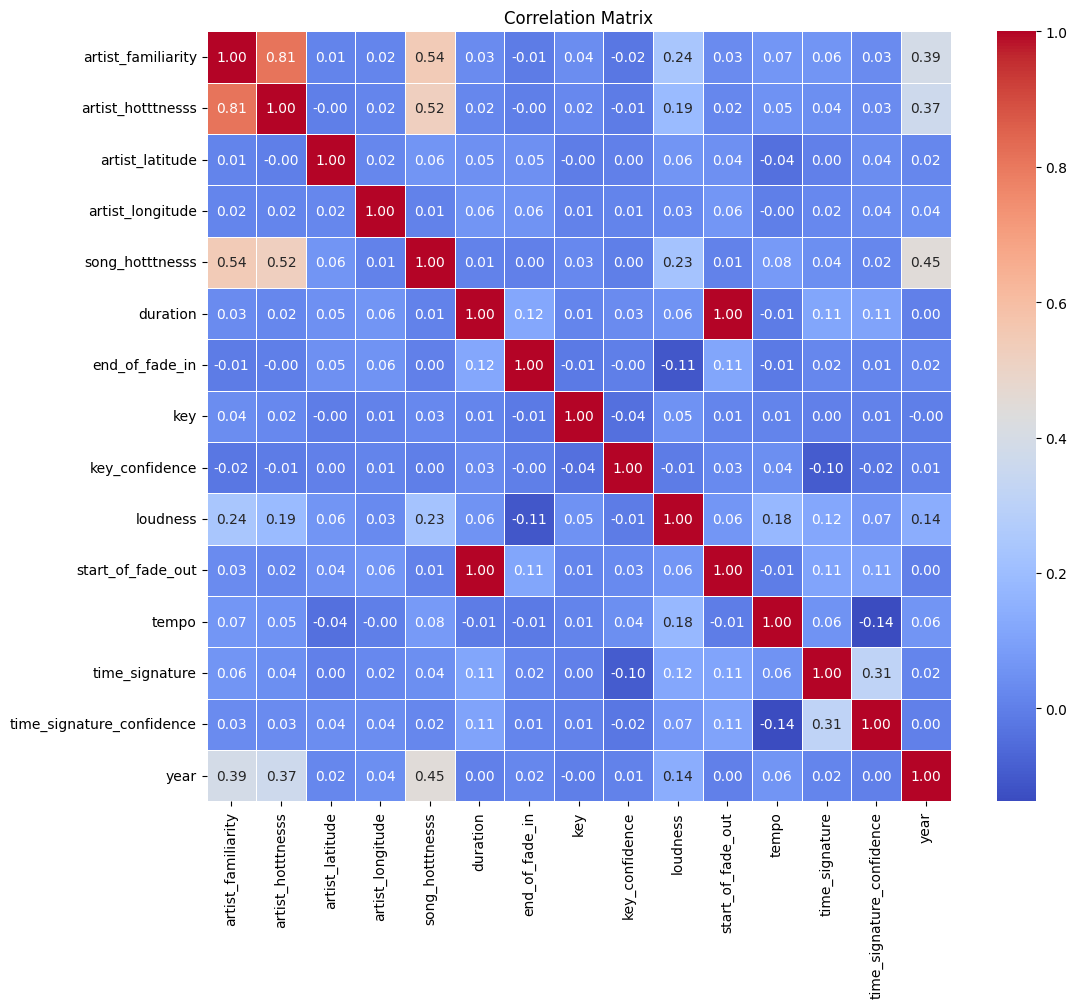

In [ ]:
# Import the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **First find NULL Values and values where year = 0**
We will first remove all years that have a value of 0 and than determine all the null values

In [ ]:
# Import the dependencies
import pandas as pd

# Load the Filename
fileName = '/content/Machine_Learning_Dataset.csv'

# Create df and remove all rows that have year = 0
df = pd.read_csv(fileName, error_bad_lines=False)
#df = df[df['year'] != 0]

# Finf all the nulls
print(df.isnull().sum())


artist_familiarity              4
artist_hotttnesss               0
artist_latitude              6257
artist_longitude             6257
artist_name                     0
song_hotttnesss              4351
audio_md5                       0
duration                        0
end_of_fade_in                  0
key                             0
key_confidence                  0
loudness                        0
start_of_fade_out               0
tempo                           0
time_signature                  0
time_signature_confidence       0
year                            0
dtype: int64


<ipython-input-10-b65e20b1f8cf>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(fileName, error_bad_lines=False)


# **Fill in NULL values with Mean using pySpark**
Fill in the null values using the mean


In [ ]:
# Import dependencies for pySpark
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import col

# Load the data into a dataframe from spark
df_spark = spark.read.csv(fileName, header=True, inferSchema=True)
df_spark = df_spark[df_spark['year'] != 0]

# Identified null values in columns loaded into an array
null_columns = ['artist_familiarity', 'artist_latitude', 'artist_longitude', 'song_hotttnesss']

# Use the Imputer to fill in null columns with the mean for that column
imputer = Imputer( inputCols=null_columns, outputCols = null_columns)
imputer_model = imputer.fit(df_spark)
df_spark_clean = imputer_model.transform(df_spark)

# Show the result
df_spark_clean.show()



+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+
|artist_familiarity| artist_hotttnesss|   artist_latitude|   artist_longitude|         artist_name|    song_hotttnesss|           audio_md5| duration|end_of_fade_in|key|key_confidence|loudness|start_of_fade_out|  tempo|time_signature|time_signature_confidence|year|
+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+
|0.4161410224693502|0.3310901263389161|          40.71455|          -74.00712|     b'Eddie Cantor'|0.44437671504926946|b'3efde64c0b508f9...|196.88444|         5.329|  5|         0.495| -14.618|         

# **One Hot encoding to finish up our preprocessing**
Use One-Hot-Encoding on our categorical variables

In [ ]:
# Import the dependencies for pySpark
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

# Determine the categoriacal variables
artist_name_col = 'artist_name'
audio_md5_col = 'audio_md5'

# Convert them into a String Index
indexer1 = StringIndexer(inputCol = artist_name_col, outputCol = 'artist_name_index')
indexer2 = StringIndexer(inputCol = audio_md5_col, outputCol = 'audio_md5_index')

# User One-Hot-Encoding on the String Index
one_hot_encoder1 = OneHotEncoder(inputCol = 'artist_name_index', outputCol = 'artist_name_one_hot')
one_hot_encoder2 = OneHotEncoder(inputCol = 'audio_md5_index' , outputCol = 'audio_md5_one_hot')

# Import Pipeline to apply the change to the spark datafreame
from pyspark.ml import Pipeline

# Create the pipeline
pipe = Pipeline(stages = [indexer1, indexer2, one_hot_encoder1, one_hot_encoder2])

# Apply the pipeline
df_spark_finished = pipe.fit(df_spark_clean).transform(df_spark_clean)

# Show the results
df_spark_finished.show()

+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+-----------------+---------------+-------------------+-------------------+
|artist_familiarity| artist_hotttnesss|   artist_latitude|   artist_longitude|         artist_name|    song_hotttnesss|           audio_md5| duration|end_of_fade_in|key|key_confidence|loudness|start_of_fade_out|  tempo|time_signature|time_signature_confidence|year|artist_name_index|audio_md5_index|artist_name_one_hot|  audio_md5_one_hot|
+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+-----------------+---------------+-------------------+-

# **Convert Data frame into proper target vector and feature vector**
apply a VectorAssembler model to our dataset and transform our dataset, afterwards split the data into training and testing


In [ ]:
# Load the dependencies
from pyspark.ml.feature import VectorAssembler

# Determine our target vector
target_vector = 'year'

# Determine our numerical features
numeric_feature_columns = ['artist_familiarity', 'artist_hotttnesss', 'artist_latitude', 'artist_longitude', 'song_hotttnesss', 'duration',
                            'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence']

# Determine our One-Hot-Encoded features
one_hot_encoded_columns = ['artist_name_one_hot', 'audio_md5_one_hot']

# Combine all our features and
all_feature_columns = numeric_feature_columns + one_hot_encoded_columns

# Create a vector for our features, including the target variable
feature_vector = VectorAssembler(inputCols=all_feature_columns, outputCol='feature_vector')

# Apply the vector to our data frame
df_ML_complete = feature_vector.transform(df_spark_finished)

# Split our data - 80% for training and 20% for testing
train, test = df_ML_complete.randomSplit([0.8, 0.2], seed=42)

# Show our final dataframe
df_ML_complete.show()


+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+-----------------+---------------+-------------------+-------------------+--------------------+
|artist_familiarity| artist_hotttnesss|   artist_latitude|   artist_longitude|         artist_name|    song_hotttnesss|           audio_md5| duration|end_of_fade_in|key|key_confidence|loudness|start_of_fade_out|  tempo|time_signature|time_signature_confidence|year|artist_name_index|audio_md5_index|artist_name_one_hot|  audio_md5_one_hot|      feature_vector|
+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+-------------

# **Use Linear Regression - ElasticNet**
Use ElasticNet model to predict year

In [ ]:
# Import the dependencies
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Loop through these alpha values - alpha values in this case are ratio of L1 and L2 reguralization
alpha_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create the model
linearRegression = LinearRegression(featuresCol='feature_vector', labelCol=target_vector, maxIter=500)

# Loop through all alpha values
for alpha in alpha_values:

    # set the alpha as alpha_value
    linearRegression.setParams(elasticNetParam = alpha)

    # fit the model
    linearRegressionModel = linearRegression.fit(train)

    # train the model
    linearRegressionTransformed = linearRegressionModel.transform(train)    # I think we need to use test here instead of train ----------------------------------------------------

    # We will be using the R2 score metric
    r2_metric = RegressionEvaluator(labelCol = target_vector, predictionCol='prediction', metricName='r2')

    # Evaluate the training score for R2
    r2_train = r2_metric.evaluate(linearRegressionTransformed)

    # Get the prediction for the testing set
    test_predict = linearRegressionModel.transform(test)

    # Evaluate the testing score for R2
    r2_test = r2_metric.evaluate(test_predict)

    print(f"Alpha value: {alpha}")
    print(f"R2 on training data: {r2_train}")
    print(f"R2 on testing data: {r2_test}")
    print("---------------------")

Alpha value: 0.0
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.1
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.2
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.3
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.4
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.5
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.6
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.7
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.8
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.9
R2 on training data: 1.0
R2 on testing data: 0.

# **Ridge Regression**
Use Ridge Regression to predict year

In [ ]:
# Import the dependencies
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Loop through these alpha values - alpha values in this case are ratio of L2 reguralization
alpha_values = [0, 0.01, 0.1, 1, 10, 100, 1000]

# Create the model
ridge = LinearRegression(featuresCol="feature_vector", labelCol=target_vector, elasticNetParam=0.0)


# Loop through all alpha values
for alpha in alpha_values:

    # Set the alpha as alpha_value
    ridge.setParams(regParam = alpha)

    # Fit the model
    ridge_model = ridge.fit(train)

    # Predict train
    ridgeTransformed = ridge_model.transform(train)

    # Scoring metric we will use is R2
    scoring_Metric = RegressionEvaluator(labelCol=target_vector, predictionCol="prediction", metricName="r2")

    # Trainig R2 score
    r2_train = scoring_Metric.evaluate(ridgeTransformed)

    # Test R2 Score
    test_predict = ridge_model.transform(test)
    r2_test = scoring_Metric.evaluate(test_predict)

    # Print the results
    print(f"Alpha value: {alpha}")
    print(f"R2 on training data: {r2_train}")
    print(f"R2 on testing data: {r2_test}")
    print("---------------------")


Alpha value: 0
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.01
R2 on training data: 0.9999997284674822
R2 on testing data: 0.3413555972661011
---------------------
Alpha value: 0.1
R2 on training data: 0.9999731533861047
R2 on testing data: 0.34066401152066017
---------------------
Alpha value: 1
R2 on training data: 0.9975925044745793
R2 on testing data: 0.3338295974997749
---------------------
Alpha value: 10
R2 on training data: 0.8923962284316026
R2 on testing data: 0.27512608173068365
---------------------
Alpha value: 100
R2 on training data: 0.32994114856719314
R2 on testing data: 0.09551305609813454
---------------------
Alpha value: 1000
R2 on training data: 0.04387435391156025
R2 on testing data: 0.012568008754352822
---------------------


# **Lasso Regression**
Use Lasso model to predict year

In [ ]:
# Import the dependencies
from pyspark.ml.regression import LinearRegression

# Alpha values
alpha_values = [0, 0.01, 0.1, 1, 10, 100, 1000]


# Loop through all alpha values
for alpha in alpha_values:

    # Create the model
    lasso = LinearRegression(featuresCol = 'feature_vector', labelCol = target_vector, maxIter = 500, regParam = alpha, elasticNetParam = 1)

    # Fit the model
    linearRegressionModel_lasso = lasso.fit(train)

    # Train the model
    lasso_Transformed = linearRegressionModel_lasso.transform(train)

    # Scoring metric we will use is R2
    scoring_Metric = RegressionEvaluator(labelCol=target_vector, predictionCol="prediction", metricName="r2")

    # Train R2 score
    r2_train = scoring_Metric.evaluate(lasso_Transformed)

    # Test R2 Score
    test_predict = linearRegressionModel_lasso.transform(test)
    r2_test = scoring_Metric.evaluate(test_predict)

    # Print the results
    print(f"Alpha value: {alpha}")
    print(f"R2 on training data: {r2_train}")
    print(f"R2 on testing data: {r2_test}")
    print("---------------------")


Alpha value: 0
R2 on training data: 1.0
R2 on testing data: 0.34143252714293293
---------------------
Alpha value: 0.01
R2 on training data: 0.9977274657153368
R2 on testing data: 0.33384183935966316
---------------------
Alpha value: 0.1
R2 on training data: 0.860726668102437
R2 on testing data: 0.30198626444390697
---------------------
Alpha value: 1
R2 on training data: 0.10283856123685764
R2 on testing data: 0.08226456131966997
---------------------
Alpha value: 10
R2 on training data: 2.853273173286652e-14
R2 on testing data: -0.00010971543457016786
---------------------
Alpha value: 100
R2 on training data: 2.853273173286652e-14
R2 on testing data: -0.00010971543457016786
---------------------
Alpha value: 1000
R2 on training data: 2.853273173286652e-14
R2 on testing data: -0.00010971543457016786
---------------------


# **Gradient Boosting**
Use Gradient Boosting to predict the year

In [ ]:
# Import the dependencies
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Max depth and learning rate values we wil test for
max_depth_values = [2, 4, 6, 8, 10]
learning_rate_values = [0.1, 0.5, 1]

# Loop through Max depth values
for depth in max_depth_values:

    # Loop through learning rate values
    for rate in learning_rate_values:

        # Create the model
        gbt = GBTRegressor(featuresCol='feature_vector', labelCol=target_vector, maxIter = 10, maxDepth = depth, stepSize = rate)

        # Fit the model
        gbt_model = gbt.fit(train)

        # Train the model
        gbtTransformed = gbt_model.transform(train)

        #Scoring metric will be R2
        scoring_metric = RegressionEvaluator(labelCol=target_vector, predictionCol='prediction', metricName='r2')

        # R2 for train
        r2_train = scoring_metric.evaluate(gbtTransformed)

        # R2 for Test
        test_predictions = gbt_model.transform(test)
        r2_test = scoring_metric.evaluate(test_predictions)

        print(f"Max Depth: {depth}, Learning Rate: {rate}")
        print(f"R2 on training data: {r2_train}")
        print(f"R2 on testing data: {r2_test}")
        print("---------------------")


Max Depth: 2, Learning Rate: 0.1
R2 on training data: 0.19555916502918347
R2 on testing data: 0.11224558872033297
---------------------
Max Depth: 2, Learning Rate: 0.5
R2 on training data: 0.27808441811240436
R2 on testing data: 0.12360789513420145
---------------------
Max Depth: 2, Learning Rate: 1
R2 on training data: 0.13494573909683028
R2 on testing data: -0.10479147675097145
---------------------
Max Depth: 4, Learning Rate: 0.1
R2 on training data: 0.27676498996393173
R2 on testing data: 0.166158116236225
---------------------
Max Depth: 4, Learning Rate: 0.5
R2 on training data: 0.3735403279207127
R2 on testing data: 0.1927735479557745
---------------------
Max Depth: 4, Learning Rate: 1
R2 on training data: 0.19555316155515257
R2 on testing data: 0.13981392601670883
---------------------
Max Depth: 6, Learning Rate: 0.1
R2 on training data: 0.35241328852683196
R2 on testing data: 0.19612044155910258
---------------------
Max Depth: 6, Learning Rate: 0.5
R2 on training data: 0

# **Normal Decison Tree**
Use the normal decison tree to predict year

In [ ]:
# Import the dependencies
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Max depth we will test for
max_depth_values = [2, 4, 6, 8, 10]

# Loop through max depth values
for max_depth in max_depth_values:

    # Create the model
    dt_reg = DecisionTreeRegressor(featuresCol='feature_vector', labelCol=target_vector, maxDepth=max_depth)

    # Fit the model
    dt_model = dt_reg.fit(train)

    # Train the model
    dtTransformed = dt_model.transform(train)

    # Scoring metric will be R2
    scoring_metric = RegressionEvaluator(labelCol=target_vector, predictionCol='prediction', metricName='r2')

    # R2 for train
    r2_train = scoring_metric.evaluate(dtTransformed)

    # R2 for test
    test_predictions = dt_model.transform(test)
    r2_test = scoring_metric.evaluate(test_predictions)

    # Print the results for the current maxDepth value
    print(f"Max Depth: {max_depth}")
    print(f"R2 on training data: {r2_train}")
    print(f"R2 on testing data: {r2_test}")
    print("---------------------")



Max Depth: 2
R2 on training data: 0.1349457390968255
R2 on testing data: 0.08283816957662604
---------------------
Max Depth: 4
R2 on training data: 0.19555316155515257
R2 on testing data: 0.1386250953328131
---------------------
Max Depth: 6
R2 on training data: 0.25479929050119454
R2 on testing data: 0.16234873489832813
---------------------
Max Depth: 8
R2 on training data: 0.34024275025453776
R2 on testing data: 0.1290499781202441
---------------------
Max Depth: 10
R2 on training data: 0.42645821193087363
R2 on testing data: 0.12020443594884289
---------------------


# **Random Forest**
Use Random Forest to predict year

In [ ]:
# Import the dependencies
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Number of trees and max depth we will test for
num_trees_values = [5, 10, 15]
max_depth_values = [3, 6, 9]

# Loop through number of trees
for num_trees in num_trees_values:

    # Loop through the max depths
    for max_depth in max_depth_values:

        # Create the model
        rf_reg = RandomForestRegressor(featuresCol='feature_vector', labelCol=target_vector, numTrees=num_trees, maxDepth=max_depth)

        # Fit the model
        rf_model = rf_reg.fit(train)

        # Train the model
        rfTransformed = rf_model.transform(train)

        # Scoring metric will be R2
        scoring_metric = RegressionEvaluator(labelCol=target_vector, predictionCol='prediction', metricName='r2')

        # Training score for R2
        r2_train = scoring_metric.evaluate(rfTransformed)

        # Testing score for R2
        test_predictions = rf_model.transform(test)
        r2_test = scoring_metric.evaluate(test_predictions)

        print(f"Num Trees: {num_trees}, Max Depth: {max_depth}")
        print(f"R2 on training data: {r2_train}")
        print(f"R2 on testing data: {r2_test}")
        print("---------------------")


Num Trees: 5, Max Depth: 3
R2 on training data: 0.15490325686152995
R2 on testing data: 0.11126678133514623
---------------------
Num Trees: 5, Max Depth: 6
R2 on training data: 0.23968487955246764
R2 on testing data: 0.13476952142227605
---------------------
Num Trees: 5, Max Depth: 9
R2 on training data: 0.34002246076304254
R2 on testing data: 0.1464869674648409
---------------------
Num Trees: 10, Max Depth: 3
R2 on training data: 0.15365071407982323
R2 on testing data: 0.11731382639749466
---------------------
Num Trees: 10, Max Depth: 6
R2 on training data: 0.2443492809957335
R2 on testing data: 0.1358582853459962
---------------------
Num Trees: 10, Max Depth: 9
R2 on training data: 0.32279883564380685
R2 on testing data: 0.14897770397935883
---------------------
Num Trees: 15, Max Depth: 3
R2 on training data: 0.16303331922587816
R2 on testing data: 0.11043094553919786
---------------------
Num Trees: 15, Max Depth: 6
R2 on training data: 0.24068770536214124
R2 on testing data: 

### New Model - Convert 'year' into Decade:

Load in Dataset

In [ ]:
# Import required packages:
from pyspark.sql.functions import floor
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import col

# Load the Filename
fileName = '/content/Machine_Learning_Dataset.csv'

# Load the data into a dataframe from spark
df_spark = spark.read.csv(fileName, header=True, inferSchema=True)
df_spark = df_spark[df_spark['year'] != 0]

# Use year column to create new 'decade' ordinal attribute ([1900-1909] = 0, [1910-1919] = 1, etc.)
df_spark = df_spark.withColumn('decade', floor((df_spark['year'] - 1920) / 10))

# Identified null values in columns loaded into an array
null_columns = ['artist_familiarity', 'artist_latitude', 'artist_longitude', 'song_hotttnesss']

# Use the Imputer to fill in null columns with the mean for that column
imputer = Imputer( inputCols=null_columns, outputCols = null_columns)
imputer_model = imputer.fit(df_spark)
df_spark_clean = imputer_model.transform(df_spark)

# Show the result
df_spark_clean.show()

# Show the unique value
unique_vals = df_spark.select('decade').distinct().show()

+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+------+
|artist_familiarity| artist_hotttnesss|   artist_latitude|   artist_longitude|         artist_name|    song_hotttnesss|           audio_md5| duration|end_of_fade_in|key|key_confidence|loudness|start_of_fade_out|  tempo|time_signature|time_signature_confidence|year|decade|
+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+------+
|0.4161410224693502|0.3310901263389161|          40.71455|          -74.00712|     b'Eddie Cantor'|0.44437671504926946|b'3efde64c0b508f9...|196.88444|         5.329|  5|         0.4

One-Hot Encoding

In [ ]:
# Import the dependencies for pySpark
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

# Determine the categoriacal variables
artist_name_col = 'artist_name'
audio_md5_col = 'audio_md5'

# Convert them into a String Index
indexer1 = StringIndexer(inputCol = artist_name_col, outputCol = 'artist_name_index')
indexer2 = StringIndexer(inputCol = audio_md5_col, outputCol = 'audio_md5_index')

# User One-Hot-Encoding on the String Index
one_hot_encoder1 = OneHotEncoder(inputCol = 'artist_name_index', outputCol = 'artist_name_one_hot')
one_hot_encoder2 = OneHotEncoder(inputCol = 'audio_md5_index' , outputCol = 'audio_md5_one_hot')

# Import Pipeline to apply the change to the spark datafreame
from pyspark.ml import Pipeline

# Create the pipeline
pipe = Pipeline(stages = [indexer1, indexer2, one_hot_encoder1, one_hot_encoder2])

# Apply the pipeline
df_spark_finished = pipe.fit(df_spark_clean).transform(df_spark_clean)

# Show the results
df_spark_finished.show()

+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+------+-----------------+---------------+-------------------+-------------------+
|artist_familiarity| artist_hotttnesss|   artist_latitude|   artist_longitude|         artist_name|    song_hotttnesss|           audio_md5| duration|end_of_fade_in|key|key_confidence|loudness|start_of_fade_out|  tempo|time_signature|time_signature_confidence|year|decade|artist_name_index|audio_md5_index|artist_name_one_hot|  audio_md5_one_hot|
+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+------+-----------------+---------------+

Create Feature Matrix and Target Vector

In [ ]:
# Load the dependencies
from pyspark.ml.feature import VectorAssembler

# Determine our target vector
target_vector = 'decade'

# Determine our numerical features
numeric_feature_columns = ['artist_familiarity', 'artist_hotttnesss', 'artist_latitude', 'artist_longitude', 'song_hotttnesss', 'duration',
                            'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence']

# Determine our One-Hot-Encoded features
one_hot_encoded_columns = ['artist_name_one_hot', 'audio_md5_one_hot']

# Combine all our features and
all_feature_columns = numeric_feature_columns + one_hot_encoded_columns

# Create a vector for our features
feature_vector = VectorAssembler(inputCols=all_feature_columns, outputCol='feature_vector')

# Apply the vector to our data frame
df_ML_complete = feature_vector.transform(df_spark_finished)

# Split our data - 80% for training and 20% for testing
train, test = df_ML_complete.randomSplit([0.8, 0.2], seed=42)

# Show our final dataframe
df_ML_complete.show()

+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+------+-----------------+---------------+-------------------+-------------------+--------------------+
|artist_familiarity| artist_hotttnesss|   artist_latitude|   artist_longitude|         artist_name|    song_hotttnesss|           audio_md5| duration|end_of_fade_in|key|key_confidence|loudness|start_of_fade_out|  tempo|time_signature|time_signature_confidence|year|decade|artist_name_index|audio_md5_index|artist_name_one_hot|  audio_md5_one_hot|      feature_vector|
+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----

In [ ]:
# Import the dependencies:
from pyspark.ml.classification import OneVsRest, LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Loop through these regularization parameters:
#max_iters = [100, 200]                         # for 'maxIter'
reg_params = [0.01, 0.1, 1.0, 10, 100]          # for 'regParam'

# Create the linearSVC model using OneVsRest approach:
#linearSVC = LinearSVC(featuresCol = 'feature_vector', labelCol = target_vector, maxIter = 200)
linearSVC = LinearSVC(maxIter = 200)
oneVrest = OneVsRest(classifier = linearSVC, featuresCol = 'feature_vector', labelCol = target_vector)

# Set up the accuracy and f1 metrics as an evaluator objects:
SVC_accuracy_evaluator = MulticlassClassificationEvaluator(labelCol = 'decade', predictionCol = 'prediction', metricName = 'accuracy')
SVC_f1_evaluator = MulticlassClassificationEvaluator(labelCol = 'decade', predictionCol = 'prediction', metricName = 'f1')

# Display header for model validation results:
print("---------------------------------------------------")
print("Decade LinearSVC Results Evaluated using OneVsRest:")
print("---------------------------------------------------")

# Loop through all regularization values:
for reg in reg_params:

    # set the current regularization value:
    linearSVC.setRegParam(reg)

    # fit the model:
    linearSVCModel = oneVrest.fit(train)

    # Make train and test predictions:
    currSVC_train_pred = linearSVCModel.transform(train)
    currSVC_test_pred = linearSVCModel.transform(test)

    # Evaluate the current model results:
    currSVC_train_accuracy = SVC_accuracy_evaluator.evaluate(currSVC_train_pred)
    currSVC_train_f1 = SVC_f1_evaluator.evaluate(currSVC_train_pred)

    currSVC_test_accuracy = SVC_accuracy_evaluator.evaluate(currSVC_test_pred)
    currSVC_test_f1 = SVC_f1_evaluator.evaluate(currSVC_test_pred)

    # Print current model results to the console:
    print(f"Regularization value used: {reg}\n")
    print(f"Accuracy on training data: {currSVC_train_accuracy}")
    print(f"F1 score on training data: {currSVC_train_f1}\n")
    print(f"Accuracy on testing data:  {currSVC_test_accuracy}")
    print(f"F1 score on testing data:  {currSVC_test_f1}")
    print("---------------------")

---------------------------------------------------
Decade LinearSVC Results Evaluated using OneVsRest:
---------------------------------------------------
Regularization value used: 0.01

Accuracy on training data: 1.0
F1 score on training data: 1.0

Accuracy on testing data:  0.6356502242152466
F1 score on testing data:  0.5884261023670524
---------------------
